**Table of contents**

*Data Analysis*

    Step 1: Import Python Libraries
    Step 2: Reading Dataset
    Step 3: Data Reduction
    Step 4: Feature Engineering
    Step 5: Creating Features
    Step 6: Data Cleaning/Wrangling
    Step 7: EDA Exploratory Data Analysis

### Step 1: Import Python Libraries

In [2]:
# Import necessary libraries

import os  # For interacting with the operating system
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
import zipfile  # For working with zip files

### Step 2: Reading Dataset

In [3]:
# Unzip the ODI World Cup 2023 dataset to a specific directory
!unzip -q '/content/ODIWorldCup2023CompleteDataset.zip' -d '/content/dataset'

In [4]:
# Define file paths for various datasets related to the ODI World Cup 2023
batting_summary_fpath = '/content/dataset/odi world cup 2023 dataset/batting_summary.csv'
bowling_summary_fpath = '/content/dataset/odi world cup 2023 dataset/bowling_summary.csv'
match_schedule_results_fpath = '/content/dataset/odi world cup 2023 dataset/match_schedule_results.csv'
world_cup_players_info_fpath = '/content/dataset/odi world cup 2023 dataset/world_cup_players_info.csv'

In [5]:
# Read CSV files into Pandas DataFrames
df_batting_summary = pd.read_csv(batting_summary_fpath)
df_bowling_summary = pd.read_csv(bowling_summary_fpath)
df_match_schedule_results = pd.read_csv(match_schedule_results_fpath)
df_world_cup_players = pd.read_csv(world_cup_players_info_fpath)

#### Understanding Data

In [6]:
# Display the first few rows of the batting summary DataFrame
df_batting_summary.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [7]:
# Display the first few rows of the bowling summary DataFrame
df_bowling_summary.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [8]:
# Display the first few rows of the match schedule and results DataFrame
df_match_schedule_results.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [9]:
# Display the first few rows of the World Cup players information DataFrame
df_world_cup_players.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


In [10]:
# Print the shapes of the DataFrames to provide information on the number of rows and columns
print(f"Shape of Batting Summary: {df_batting_summary.shape}")
print(f"Shape of Bowling Summary: {df_bowling_summary.shape}")
print(f"Shape of Match Schedule Results: {df_match_schedule_results.shape}")
print(f"Shape of World Cup Players Info: {df_world_cup_players.shape}")

Shape of Batting Summary: (916, 11)
Shape of Bowling Summary: (574, 9)
Shape of Match Schedule Results: (48, 7)
Shape of World Cup Players Info: (151, 7)


In [11]:
# Print the data types of columns in each DataFrame
print(f"Data Types of Batting Summary: {df_batting_summary.dtypes}\n")
print(f"Data Types of Bowling Summary: {df_bowling_summary.dtypes}\n")
print(f"Data Types Shape of Match Schedule Results: {df_match_schedule_results.dtypes}\n")
print(f"Data Types Shape of World Cup Players Info: {df_world_cup_players.dtypes}")

Data Types of Batting Summary: Match_no             int64
Match_Between       object
Team_Innings        object
Batsman_Name        object
Batting_Position     int64
Dismissal           object
Runs                 int64
Balls                int64
4s                   int64
6s                   int64
Strike_Rate         object
dtype: object

Data Types of Bowling Summary: Match_no           int64
Match_Between     object
Bowling_Team      object
Bowler_Name       object
Overs            float64
Maidens            int64
Runs               int64
Wickets            int64
Economy          float64
dtype: object

Data Types Shape of Match Schedule Results: Match_no          int64
Date             object
Venue            object
Team1            object
Team2            object
Winner           object
Scorecard URL    object
dtype: object

Data Types Shape of World Cup Players Info: player_name        object
team_name          object
image_of_player    object
battingStyle       object
bowlingStyl

In [12]:
# Print concise summary of each DataFrame's info, including data types and memory usage
print(f"Info of Batting Summary: {df_batting_summary.info()}\n")
print(f"Info of Bowling Summary: {df_bowling_summary.info()}\n")
print(f"Info of Match Schedule Results: {df_match_schedule_results.info()}\n")
print(f"Info of World Cup Players Info: {df_world_cup_players.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-null    object
 6   Runs              916 non-null    int64 
 7   Balls             916 non-null    int64 
 8   4s                916 non-null    int64 
 9   6s                916 non-null    int64 
 10  Strike_Rate       916 non-null    object
dtypes: int64(6), object(5)
memory usage: 78.8+ KB
Info of Batting Summary: None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_no       574

In [13]:
# Print the number of duplicate values in each DataFrame
print(f"No. of Duplicate values in Batting Summary: {df_batting_summary.duplicated().sum()}")
print(f"No. of Duplicate values in Bowling Summary: {df_bowling_summary.duplicated().sum()}")
print(f"No. of Duplicate values in Match Schedule Results: {df_match_schedule_results.duplicated().sum()}")
print(f"No. of Duplicate values in World Cup Players Info: {df_world_cup_players.duplicated().sum()}")

No. of Duplicate values in Batting Summary: 0
No. of Duplicate values in Bowling Summary: 0
No. of Duplicate values in Match Schedule Results: 0
No. of Duplicate values in World Cup Players Info: 0


In [14]:
# Print the number of null values in each column of each DataFrame
print(f"Null values in Batting Summary: \n{df_batting_summary.isnull().sum()}\n")
print(f"Null values in Bowling Summary: \n{df_bowling_summary.isnull().sum()}\n")
print(f"Null values in Match Schedule Results: \n{df_match_schedule_results.isnull().sum()}\n")
print(f"Null values in World Cup Players Info: \n{df_world_cup_players.isnull().sum()}")

Null values in Batting Summary: 
Match_no            0
Match_Between       0
Team_Innings        0
Batsman_Name        0
Batting_Position    0
Dismissal           2
Runs                0
Balls               0
4s                  0
6s                  0
Strike_Rate         0
dtype: int64

Null values in Bowling Summary: 
Match_no         0
Match_Between    0
Bowling_Team     0
Bowler_Name      0
Overs            0
Maidens          0
Runs             0
Wickets          0
Economy          0
dtype: int64

Null values in Match Schedule Results: 
Match_no         0
Date             0
Venue            0
Team1            0
Team2            0
Winner           0
Scorecard URL    0
dtype: int64

Null values in World Cup Players Info: 
player_name         0
team_name           0
image_of_player    66
battingStyle        0
bowlingStyle        6
playingRole         0
description        17
dtype: int64


In [15]:
# Print the percentage of null values in each column of each DataFrame
print(f"% of Null values in Batting Summary: \n{(df_batting_summary.isnull().sum()/(len(df_batting_summary)))*100}\n")
print(f"% of Null values in Bowling Summary: \n{(df_bowling_summary.isnull().sum()/(len(df_bowling_summary)))*100}\n")
print(f"% of Null values in Match Schedule Results: \n{(df_match_schedule_results.isnull().sum()/(len(df_match_schedule_results)))*100}\n")
print(f"% ofNull values in World Cup Players Info: \n{(df_world_cup_players.isnull().sum()/(len(df_world_cup_players)))*100}")

% of Null values in Batting Summary: 
Match_no            0.000000
Match_Between       0.000000
Team_Innings        0.000000
Batsman_Name        0.000000
Batting_Position    0.000000
Dismissal           0.218341
Runs                0.000000
Balls               0.000000
4s                  0.000000
6s                  0.000000
Strike_Rate         0.000000
dtype: float64

% of Null values in Bowling Summary: 
Match_no         0.0
Match_Between    0.0
Bowling_Team     0.0
Bowler_Name      0.0
Overs            0.0
Maidens          0.0
Runs             0.0
Wickets          0.0
Economy          0.0
dtype: float64

% of Null values in Match Schedule Results: 
Match_no         0.0
Date             0.0
Venue            0.0
Team1            0.0
Team2            0.0
Winner           0.0
Scorecard URL    0.0
dtype: float64

% ofNull values in World Cup Players Info: 
player_name         0.000000
team_name           0.000000
image_of_player    43.708609
battingStyle        0.000000
bowlingStyle    

### Step 3: Data Reduction

In [16]:
# Iterate over rows using enumerate to get both index and boolean value indicating NaN presence in each row
for id, has_nan in enumerate(df_batting_summary.isna().any(axis=1)):
    # Check if the row has any NaN values
    if has_nan:
        # Print the index of rows with NaN values
        print(id)

679
740


In [17]:
# Display the shape (number of rows and columns) of the DataFrame
df_batting_summary.shape

(916, 11)

In [18]:
# Create a new DataFrame by removing rows containing NaN values
new_df_batting_summary = df_batting_summary.dropna()

# Display the shape (number of rows and columns) of the new DataFrame without NaN values
new_df_batting_summary.shape

(914, 11)

In [19]:
# Remove duplicate rows from the new DataFrame
new_df_batting_summary = new_df_batting_summary.drop_duplicates()

# Display the shape (number of rows and columns) of the DataFrame after removing duplicates
new_df_batting_summary.shape

(914, 11)

In [20]:
# Drop specific rows by index from the new DataFrame in-place
new_df_batting_summary.drop(axis=0, index=[161, 200], inplace=True)

# Display the shape (number of rows and columns) of the DataFrame after dropping specified rows
new_df_batting_summary.shape

(912, 11)

In [21]:
# Create a new DataFrame by dropping specified columns ('image_of_player', 'description')
new_df_world_cup_players = df_world_cup_players.drop(['image_of_player', 'description'], axis=1)

# Display the shape (number of rows and columns) of the new DataFrame
new_df_world_cup_players.shape

(151, 5)

#### Saving Reducted Data to CSV Files

In [22]:
# def save_dataframes_to_csv(dataframes_dict):
#     """
#     Save each DataFrame in the given dictionary to a CSV file with the same name.

#     Parameters:
#     - dataframes_dict: Dictionary containing DataFrame names as keys and DataFrames as values.

#     Returns:
#     - result_dict: Dictionary containing DataFrame names as keys and corresponding CSV file names as values.
#     """
#     result_dict = {}

#     for df_name, df in dataframes_dict.items():
#         # Save DataFrame to CSV with the same name as DataFrame
#         csv_filename = f"{df_name}.csv"
#         df.to_csv(csv_filename, index=False)

#         # Store the CSV filename in the result dictionary
#         result_dict[df_name] = csv_filename

#     return result_dict

# # DataFrames
# dataframes_dict = {
#     'new_df_batting_summary': new_df_batting_summary,
#     'df_bowling_summary': df_bowling_summary,
#     'df_match_schedule_results': df_match_schedule_results,
#     'new_df_world_cup_players': new_df_world_cup_players
# }

# # Call the function with the dictionary of DataFrames
# result_filenames = save_dataframes_to_csv(dataframes_dict)

# # Print the result
# print("CSV filenames for each DataFrame:")
# print(result_filenames)

In [23]:
# # Assuming you have previously created and saved CSV files using the save_dataframes_to_csv function

# csv_filenames = ['new_df_batting_summary.csv', 'df_bowling_summary.csv', 'df_match_schedule_results.csv', 'new_df_world_cup_players.csv']

# # Specify the name for the zip file
# zip_filename = 'dataframes.zip'

# # Create a zip file and add CSV files to it
# with zipfile.ZipFile(zip_filename, 'w') as zip_file:
#     for csv_filename in csv_filenames:
#         zip_file.write(csv_filename)

# # Download the zip file
# from google.colab import files
# files.download(zip_filename)

### Step 4: Feature Engineering
### Step 5: Creating Features

#### Feature Engineering from **Batting_Summary** File

In [24]:
# Display the first few rows of the DataFrame 'new_df_batting_summary'
new_df_batting_summary.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [25]:
# Display the shape (number of rows and columns) of the DataFrame 'new_df_batting_summary'
new_df_batting_summary.shape

(912, 11)

Added New Attributes

1.   **Total_Boundries**



In [26]:
# Calculate and add a new column 'Total_Boundaries' by summing up '4s' and '6s' columns for each row
new_df_batting_summary['Total_Boundaries'] = new_df_batting_summary.loc[:, ['4s', '6s']].sum(axis=1)

# Display the first few rows of the DataFrame 'new_df_batting_summary' with the new column
new_df_batting_summary.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Total_Boundaries
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,5
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300,2
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500,5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300,5
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700,1


In [27]:
# Display the shape (number of rows and columns) of the DataFrame 'new_df_batting_summary'
new_df_batting_summary.shape

(912, 12)

#### Feature Engineering from **Bowling_Summary** File

In [28]:
# Display the first few rows of the DataFrame 'df_bowling_summary'
df_bowling_summary.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [29]:
# Display the shape (number of rows and columns) of the DataFrame 'df_bowling_summary'
df_bowling_summary.shape

(574, 9)

Added New Attributes

1.   **Total_Balls**

In [30]:
def cal_tballs(overs):
    """
    Calculate the total number of balls from overs.

    Parameters:
    - overs: A string representing overs in the format 'x.y' where x is the number of completed overs, and y is the number of balls in the current over.

    Returns:
    - total_balls: The total number of balls.
    """
    overs = str(overs)
    balls = overs.split(".")
    total_balls = (int(balls[0]) * 6) + int(balls[1])

    return total_balls


In [31]:
# Apply the cal_tballs function to calculate and add a new column 'Total_Balls' based on 'Overs'
df_bowling_summary['Total_Balls'] = df_bowling_summary['Overs'].apply(cal_tballs)

In [32]:
# Display the shape (number of rows and columns) of the DataFrame 'df_bowling_summary'
df_bowling_summary.shape

(574, 10)

#### Feature Engineering from **World_Cup_Players** File

In [33]:
# Display the first few rows of the DataFrame 'new_df_world_cup_players'
new_df_world_cup_players.head()

,player_name,team_name,battingStyle,bowlingStyle,playingRole
0,Jonny Bairstow,England,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter
1,Joe Root,England,Right hand Bat,Right arm Offbreak,Top order Batter
2,Jos Buttler,England,Right hand Bat,,Wicketkeeper Batter
3,Will Young,New Zealand,Right hand Bat,Right arm Offbreak,Top order Batter
4,Rachin Ravindra,New Zealand,Left hand Bat,Slow Left arm Orthodox,Top order Batter


In [34]:
# Display the shape (number of rows and columns) of the DataFrame 'new_df_world_cup_players'
new_df_world_cup_players.shape

(151, 5)

#### Feature Engineering from **Match_Schedule_Results** File

In [35]:
# Display the first few rows of the DataFrame 'df_match_schedule_results'
df_match_schedule_results.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [36]:
# Display the shape (number of rows and columns) of the DataFrame 'df_match_schedule_results'
df_match_schedule_results.shape

(48, 7)

### Step 6: Data Cleaning/Wrangling

In [37]:
# Display the data types of columns in the DataFrame 'new_df_batting_summary'
new_df_batting_summary.dtypes

Match_no             int64
Match_Between       object
Team_Innings        object
Batsman_Name        object
Batting_Position     int64
Dismissal           object
Runs                 int64
Balls                int64
4s                   int64
6s                   int64
Strike_Rate         object
Total_Boundaries     int64
dtype: object

In [38]:
# Convert 'Strike_Rate' column to numeric float, replacing non-convertible values with NaN
new_df_batting_summary['Strike_Rate'] = pd.to_numeric(new_df_batting_summary['Strike_Rate'], errors='coerce')

In [39]:
new_df_batting_summary.dtypes

Match_no              int64
Match_Between        object
Team_Innings         object
Batsman_Name         object
Batting_Position      int64
Dismissal            object
Runs                  int64
Balls                 int64
4s                    int64
6s                    int64
Strike_Rate         float64
Total_Boundaries      int64
dtype: object

### Step 7: **EDA Exploratory Data Analysis**

#### Batting Stats - ODI Cricket WorldCup 2023

**Batting Stats - ODI Cricket WorldCup 2023**



In [40]:
# Display the first few rows of the DataFrame 'new_df_batting_summary'
new_df_batting_summary.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Total_Boundaries
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,5
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3,2
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5,5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3,5
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7,1


In [41]:
# Display the shape (number of rows and columns) of the DataFrame 'new_df_batting_summary'
new_df_batting_summary.shape

(912, 12)

1.  **Top Boundary Scorer - ODI Circket WorldCup 2023**

In [42]:
# Drop specific rows by index from the DataFrame 'new_df_batting_summary' in-place
new_df_batting_summary.drop(axis=0, index=[181, 224], inplace=True)

# Display the shape (number of rows and columns) of the DataFrame after dropping specified rows
new_df_batting_summary.shape

(910, 12)

In [43]:
# Calculate the total boundaries for each player and create a DataFrame
df_total_boundaries = new_df_batting_summary.groupby('Batsman_Name')['Total_Boundaries'].sum()
df_total_boundaries = pd.DataFrame(df_total_boundaries, columns=['Total_Boundaries']).reset_index()

# Find the index of the row with the maximum value in the 'Total_Boundaries' column
max_index = df_total_boundaries['Total_Boundaries'].idxmax()

# Extract and print the total boundaries and corresponding batsman's name
print(f"Total Boundaries: {df_total_boundaries.at[max_index, 'Total_Boundaries']}")
print(f"Batsman_Name: {df_total_boundaries.at[max_index, 'Batsman_Name']}")

Total Boundaries: 97
Batsman_Name: Rohit Sharma


*   Total Boundaries: **97 (Fours & Sixes)**
*   Batsman Name: **Rohit Sharma**

In [44]:
# Create a new DataFrame sorted by 'Total_Boundaries' in descending order
df_top_total_boundaries = df_total_boundaries.sort_values(by='Total_Boundaries', ascending=False)

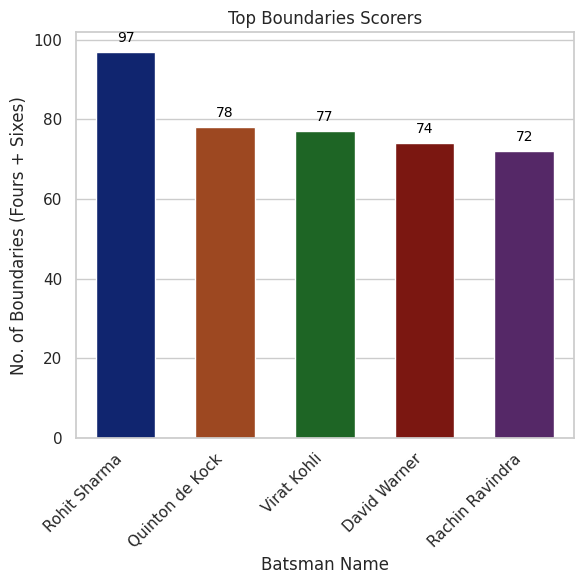

In [45]:
# Select the top 5 batsmen with the highest total boundaries
df = df_top_total_boundaries.head(5)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Batsman_Name', y='Total_Boundaries', data=df, palette='dark', width=0.6)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='No. of Boundaries (Fours + Sixes)')
plt.title('Top Boundaries Scorers')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


2. **Top 4s Scorer**

In [46]:
# Calculate the total number of 4s for each player and create a DataFrame
boundaries = new_df_batting_summary.groupby('Batsman_Name')['4s'].sum()
boundaries = pd.DataFrame(boundaries, columns=['4s']).reset_index()

# Find the index of the row with the maximum value in the '4s' column
max_index = boundaries['4s'].idxmax()

# Extract and print the total number of 4s and corresponding batsman's name
print(f"Total 4s: {boundaries.at[max_index, '4s']}")
print(f"Batsman_Name: {boundaries.at[max_index, 'Batsman_Name']}")

Total 4s: 68
Batsman_Name: Virat Kohli


*   Total 4s: **68 (Fours)**
*   Batsman Name: **Virat Kholi**

In [47]:
# Create a new DataFrame sorted by '4s' in descending order
df_top_boundaries_4s = boundaries.sort_values(by='4s', ascending=False)

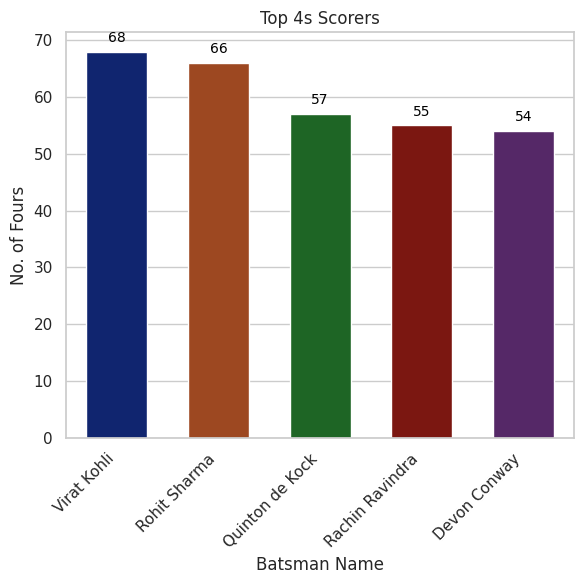

In [48]:
# Select the top 5 batsmen with the highest total number of 4s
df = df_top_boundaries_4s.head(5)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Batsman_Name', y='4s', data=df, palette='dark', width=0.6)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='No. of Fours')
plt.title('Top 4s Scorers')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

3. **Top 6s Scorer**

In [49]:
# Calculate the total number of 6s for each player and create a DataFrame
boundaries = new_df_batting_summary.groupby('Batsman_Name')['6s'].sum()
boundaries = pd.DataFrame(boundaries, columns=['6s']).reset_index()

# Find the index of the row with the maximum value in the '6s' column
max_index = boundaries['6s'].idxmax()

# Extract and print the total number of 6s and corresponding batsman's name
print(f"Total 6s: {boundaries.at[max_index, '6s']}")
print(f"Batsman_Name: {boundaries.at[max_index, 'Batsman_Name']}")

Total 6s: 31
Batsman_Name: Rohit Sharma


*   Total 6s: **31 (Sixes)**
*   Batsman Name: **Rohit Sharma**

In [50]:
# Create a new DataFrame sorted by '6s' in descending order
df_top_boundaries_6s = boundaries.sort_values(by='6s', ascending=False)

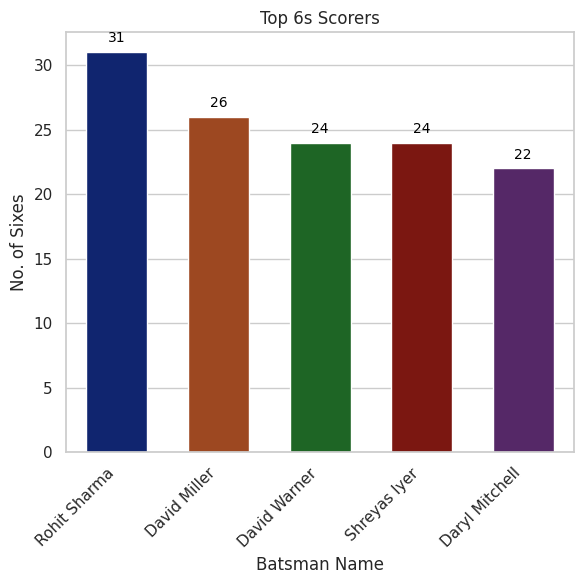

In [51]:
# Select the top 5 batsmen with the highest total number of 6s
df = df_top_boundaries_6s.head(5)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Batsman_Name', y='6s', data=df, palette='dark', width=0.6)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='No. of Sixes')
plt.title('Top 6s Scorers')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

4. **Top Run Scorers**

In [52]:
# Calculate the total runs for each player and create a DataFrame
most_runs = new_df_batting_summary.groupby('Batsman_Name')['Runs'].sum()
most_runs = pd.DataFrame(most_runs, columns=['Runs']).reset_index()

# Find the index of the row with the maximum value in the 'Runs' column
max_index = most_runs['Runs'].idxmax()

# Extract and print the total runs and corresponding batsman's name
print(f"Total Runs: {most_runs.at[max_index, 'Runs']}")
print(f"Batsman_Name: {most_runs.at[max_index, 'Batsman_Name']}")

Total Runs: 765
Batsman_Name: Virat Kohli


*   Total Runs: **765 (Runs)**
*   Batsman Name: **Virat Kholi**

5.  **Highest Individual Score by a Batsman - ODI Circket World Cup 2023**

In [53]:
# Display rows with the maximum runs in the DataFrame 'new_df_batting_summary'
new_df_batting_summary[new_df_batting_summary['Runs'] == new_df_batting_summary['Runs'].max()]

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Total_Boundaries
767,39,Afghanistan vs Australia,Australia,Glenn Maxwell,6,not out,201,128,21,10,157.0,31


*   Highest Individual Runs: **201 (Runs)**
*   Batsman Name: **Glenn Maxwell**

6.  **Highest Strike Rate by a Batsman - ODI Circket World Cup 2023**

In [54]:
# Display rows with the maximum strike rate in the DataFrame 'new_df_batting_summary'
new_df_batting_summary[new_df_batting_summary['Strike_Rate'] == new_df_batting_summary['Strike_Rate'].max()]

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Total_Boundaries
636,32,South Africa vs New Zealand,South Africa,Aiden Markram,6,run out,6,1,0,1,600.0,1


*   Highest Individual Strike Rate: **600 (Strike Rate)**
*   Batsman Name: **Aiden Markram**

7.  **Top Runs Scorer Batsmen at each Batting Positions - ODI Circket WorldCup 2023**

In [55]:
# Find the index of the top runs scorer batsmen at each batting position
max_runs_indices = new_df_batting_summary.groupby('Batting_Position')['Runs'].idxmax()

# Extract the corresponding values for Batsman_Name, Batting_Position, and Runs
max_runs_data = new_df_batting_summary.loc[max_runs_indices, ['Batsman_Name', 'Batting_Position', 'Runs']]

# Print the result
print("Maximum runs scored by each batsman at different positions:")
print(max_runs_data)

Maximum runs scored by each batsman at different positions:
         Batsman_Name  Batting_Position  Runs
458   Quinton de Kock                 1   174
109       Dawid Malan                 2   140
841    Mitchell Marsh                 3   177
891    Daryl Mitchell                 4   134
411  Heinrich Klaasen                 5   109
767     Glenn Maxwell                 6   201
318     Scott Edwards                 7    78
396    Logan van Beek                 8    59
330    Keshav Maharaj                 9    40
425         Mark Wood                10    43
864        Haris Rauf                11    35


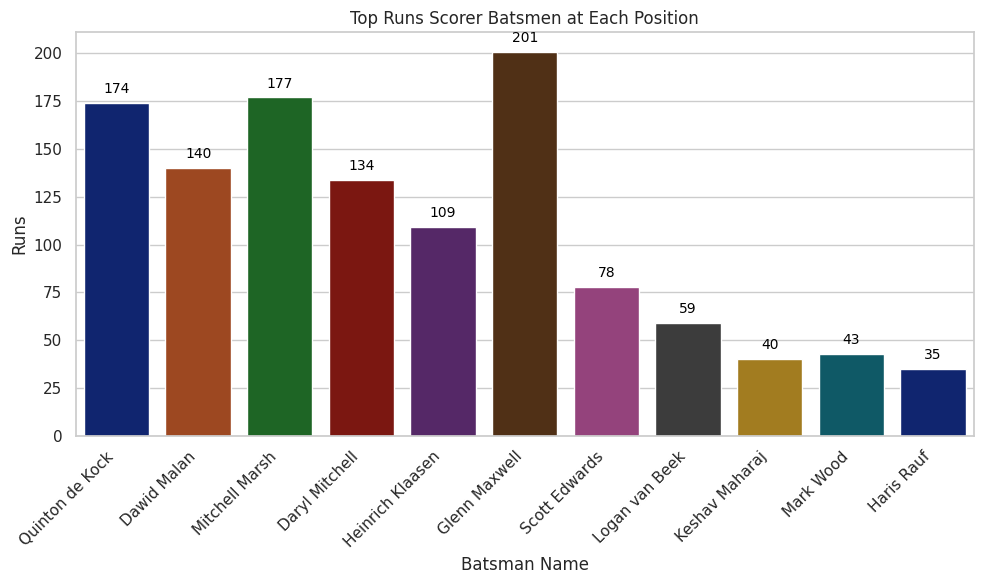

In [56]:
# Display the top runs scorer batsmen at each batting position
top_players_max_runs_ep = max_runs_data

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Batsman_Name', y='Runs', data=top_players_max_runs_ep, palette='dark')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='Runs')
plt.title('Top Runs Scorer Batsmen at Each Position')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

8. **Top 10 Batsmen by Most Runs - ODI Cricket WorldCup 2023**

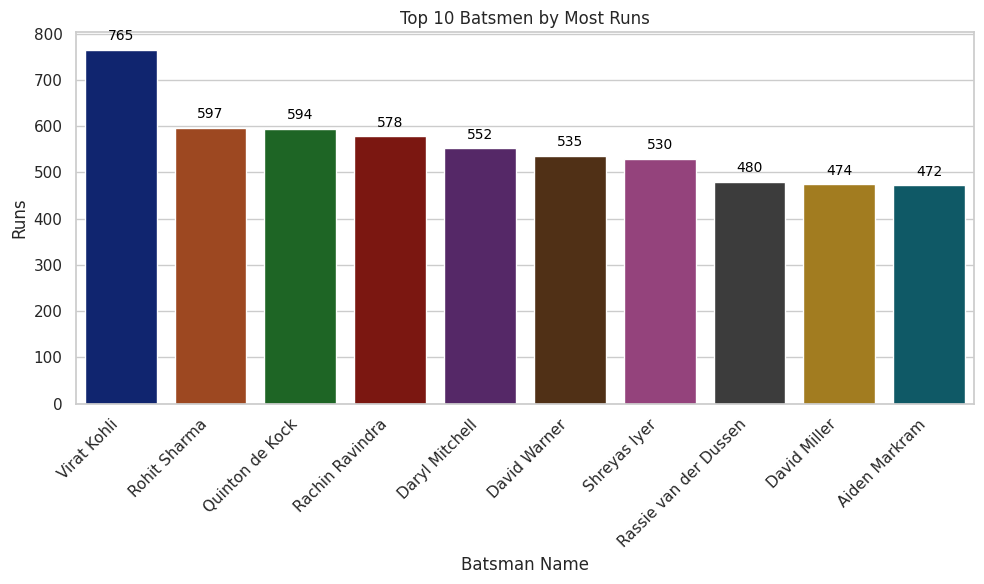

In [57]:
# Sort the DataFrame by most runs in descending order
sorted_most_runs = most_runs.sort_values(by="Runs", ascending=False)

# Select the top 10 players by most runs
top_10_most_runs_players = sorted_most_runs.head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Batsman_Name', y='Runs', data=top_10_most_runs_players, palette='dark')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='Runs')
plt.title('Top 10 Batsmen by Most Runs')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

9.  **Top 10 Batsmen by Batting Average - ODI Circket World Cup 2023**

In [58]:
# Custom function to map dismissal values to binary (1 for 'out' and 0 for 'not out')
def map_dismissal(value):
    return 0 if value == 'not out' else 1

# Apply the custom function to the 'Dismissal' column and create a new column 'Out'
new_df_batting_summary['Out'] = new_df_batting_summary['Dismissal'].apply(map_dismissal)

In [59]:
# Create DataFrames for total runs and total dismissals
df_batsman_runs = pd.DataFrame(new_df_batting_summary.groupby(['Batsman_Name'])['Runs'].sum()).reset_index()
df_batsman_out = pd.DataFrame(new_df_batting_summary.groupby(['Batsman_Name'])['Out'].sum()).reset_index()

# Col-wise concatenation (stacking one DataFrame next to another)
df_batsman_average = pd.concat([df_batsman_runs, df_batsman_out['Out']], axis=1)

# Function to calculate batting average
def calculate_batting_average(df):
    total_runs = df['Runs']
    num_dismissals = df['Out']

    # Avoid division by zero, return None if the player was not dismissed
    if num_dismissals == 0:
        return None
    else:
        return total_runs / num_dismissals

# Apply the custom function to create a new column 'Batting_Average'
df_batsman_average['Batting_Average'] = df_batsman_average.apply(calculate_batting_average, axis=1)

# Display the modified DataFrame
# print(df_batsman_average[['Batsman_Name', 'Batting_Average']])

In [60]:
# Sort dataframe by batting average in descending order
sorted_dataframe = df_batsman_average.sort_values(by="Batting_Average", ascending=False)

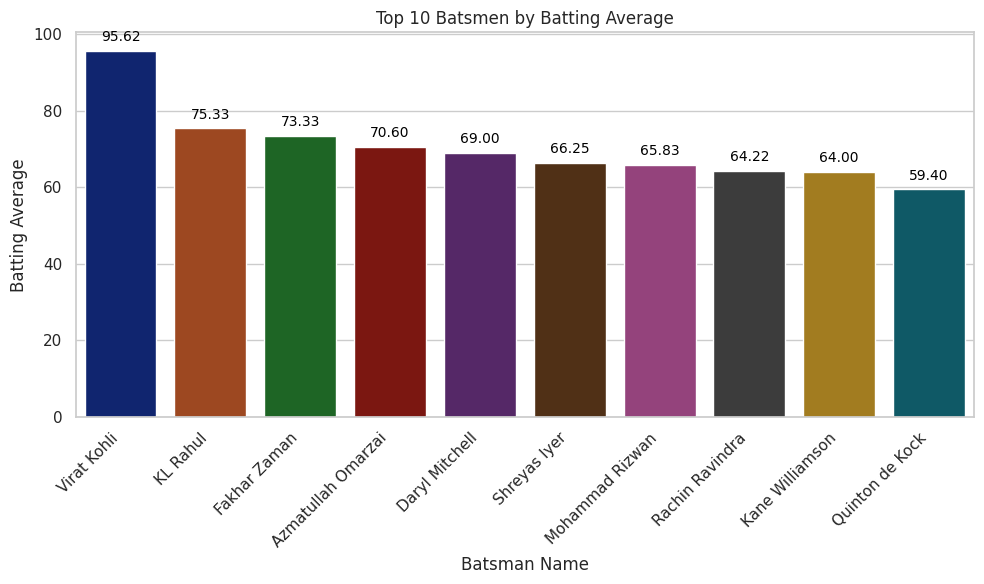

In [61]:
# Select the top 10 players by batting average
top_10_batting_average_players = sorted_dataframe.head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Batsman_Name', y='Batting_Average', data=top_10_batting_average_players, palette='dark')

# Annotate each bar with its value (rounded to 2 decimal places)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='Batting Average')
plt.title('Top 10 Batsmen by Batting Average')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

10.  **Top Batsmen by Most Centuries and Fifties Scored - ODI Circket World Cup 2023**

In [62]:
new_df_batting_summary.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Total_Boundaries,Out
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,5,1
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3,2,1
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5,5,1
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3,5,1
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7,1,1


In [63]:
# Drop rows with specified indices (167, 206) from the DataFrame 'new_df_batting_summary'
new_df_batting_summary.drop(axis=0, index=[167, 206], inplace=True)

# Display the shape of the modified DataFrame
new_df_batting_summary.shape

(908, 13)

In [64]:
# Function to count centuries
def count_centuries(runs):
    if runs >= 100:
        return 1
    else:
        return 0

# Function to count fifties
def count_fifties(runs):
    if 50 <= runs < 100:
        return 1
    else:
        return 0

# Apply the custom functions to create new columns 'Century' and 'Fifty'
new_df_batting_summary['Century'] = new_df_batting_summary['Runs'].apply(count_centuries)
new_df_batting_summary['Fifty'] = new_df_batting_summary['Runs'].apply(count_fifties)

# Create DataFrames for total centuries and total fifties scored by each player
df_centuries_scored = pd.DataFrame(new_df_batting_summary.groupby(['Batsman_Name'])['Century'].sum()).reset_index()
df_fifties_scored = pd.DataFrame(new_df_batting_summary.groupby(['Batsman_Name'])['Fifty'].sum()).reset_index()

# Sort DataFrames by the total number of centuries and fifties in descending order
df_centuries_scored = df_centuries_scored.sort_values(by='Century', ascending=False)
df_fifties_scored = df_fifties_scored.sort_values(by='Fifty', ascending=False)

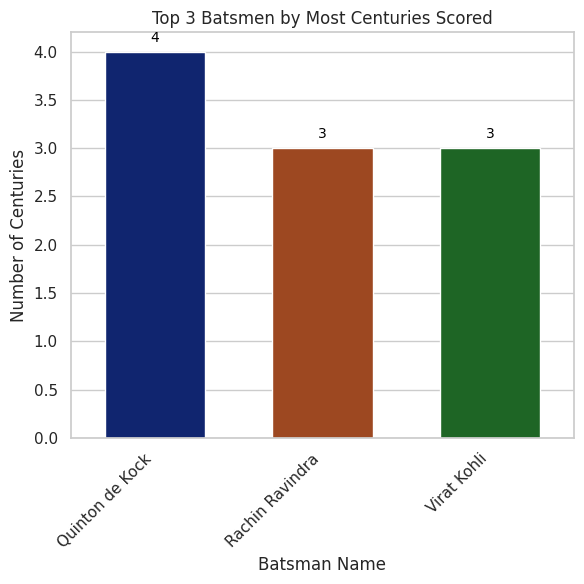

In [65]:
# Select the top 3 players by the total number of centuries
df_top_centuries_scored = df_centuries_scored.head(3)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Batsman_Name', y='Century', data=df_top_centuries_scored, palette='dark', width=0.6)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='Number of Centuries')
plt.title('Top 3 Batsmen by Most Centuries Scored')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

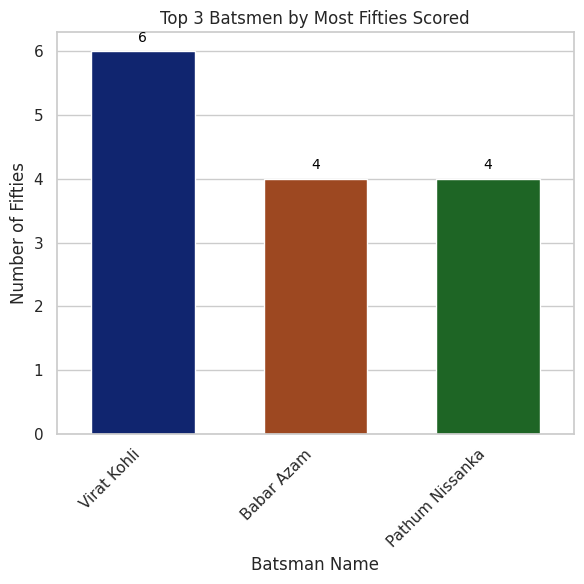

In [66]:
# Select the top 3 players by the total number of fifties
df_top_fifties_scored = df_fifties_scored.head(3)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Batsman_Name', y='Fifty', data=df_top_fifties_scored, palette='dark', width=0.6)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Batsman Name', ylabel='Number of Fifties')
plt.title('Top 3 Batsmen by Most Fifties Scored')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Bowling Stats - ODI Cricket WorldCup 2023

In [67]:
df_bowling_summary.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy,Total_Balls
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8,60
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8,60
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7,60
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0,42
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6,60


In [68]:
df_bowling_summary.shape

(574, 10)

1.  **Top wicket-takers**

In [69]:
# Create DataFrame for total wickets taken by each bowler
df_wicket_takers = pd.DataFrame(df_bowling_summary.groupby(["Bowler_Name"])["Wickets"].sum()).reset_index()

# Sort DataFrame by the total number of wickets in descending order
df_top_wicket_takers = df_wicket_takers.sort_values(by='Wickets', ascending=False)

# Display the top 5 bowlers by the total number of wickets
# df_top_wicket_takers.head(5)

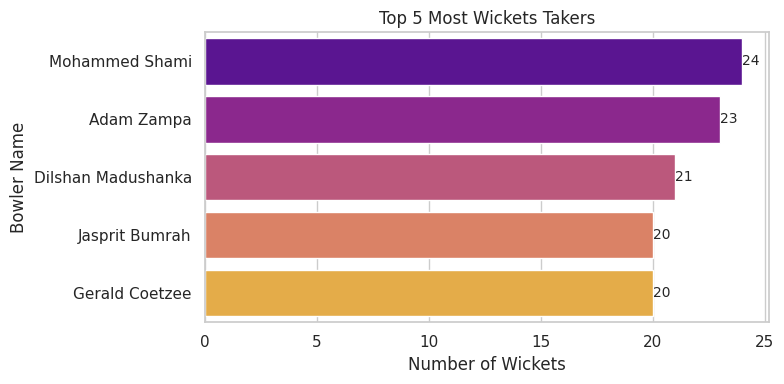

In [70]:
# Select the top 5 bowlers by the total number of wickets
df = df_top_wicket_takers.head(5)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a horizontal bar graph using Seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Wickets', y='Bowler_Name', data=df, palette='plasma', orient='h')

# Add labels to the bars
ax.bar_label(ax.containers[0], fontsize=10)

# Set plot labels and title
ax.set(xlabel='Number of Wickets', ylabel='Bowler Name')
plt.title('Top 5 Most Wickets Takers')

# Adjust x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

2. **Most Balls bowled**

In [71]:
df_bowling_summary.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy,Total_Balls
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8,60
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8,60
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7,60
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0,42
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6,60


In [72]:
# Create DataFrame for the total number of balls bowled by each bowler (top 5)
df_most_balls_bowled = pd.DataFrame(df_bowling_summary.groupby(["Bowler_Name"])["Total_Balls"].sum().nlargest(5)).reset_index()

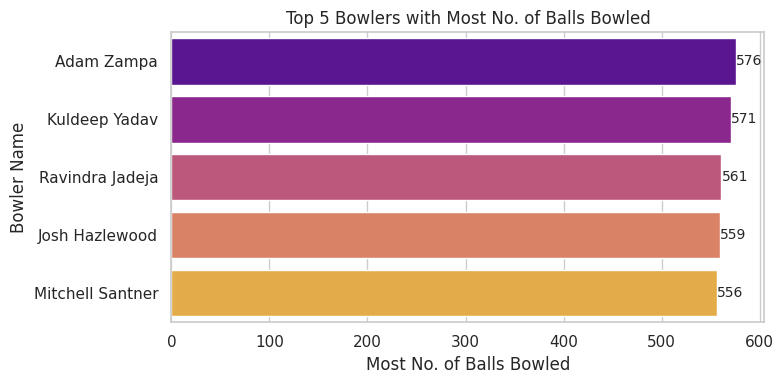

In [73]:
# Select the top 5 bowlers with the most number of balls bowled
df = df_most_balls_bowled

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a horizontal bar graph using Seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Total_Balls', y='Bowler_Name', data=df, palette='plasma', orient='h')

# Add labels to the bars
ax.bar_label(ax.containers[0], fontsize=10)

# Set plot labels and title
ax.set(xlabel='Most No. of Balls Bowled', ylabel='Bowler Name')
plt.title('Top 5 Bowlers with Most No. of Balls Bowled')

# Adjust x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

3.  **Best bowling averages**

In [74]:
df_bowling_summary.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy,Total_Balls
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8,60
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8,60
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7,60
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0,42
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6,60


In [75]:
# Calculate total runs and total wickets for each bowler
bowler_stats = df_bowling_summary.groupby("Bowler_Name").agg({
    'Runs': 'sum',
    'Wickets': 'sum',
    'Match_no': 'count'  # Counting the total matches played by each bowler
})

bowler_stats = bowler_stats.reset_index()

# Calculate bowling average for each bowler
bowler_stats['Bowling_Average'] = bowler_stats['Runs'] / bowler_stats['Wickets']
# Sort values by Bowling_Average
bowler_stats = bowler_stats.sort_values(by="Bowling_Average")

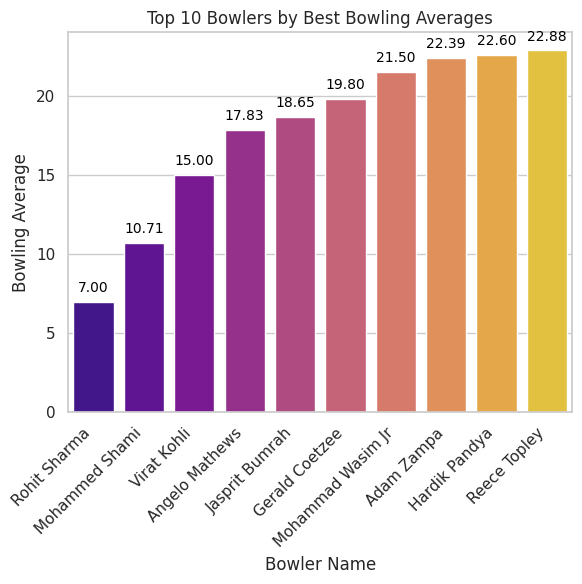

In [76]:
# Select the top 10 bowlers by the best bowling averages
df = bowler_stats.head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Bowler_Name', y='Bowling_Average', data=df, palette='plasma')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Bowler Name', ylabel='Bowling Average')
plt.title('Top 10 Bowlers by Best Bowling Averages')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

4.  **Most Economical Bowlers**

In [77]:
df_bowling_summary.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy,Total_Balls
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8,60
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8,60
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7,60
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0,42
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6,60


In [78]:
# Create DataFrame for the average economy rate of each bowler
df_no_matches_BP = pd.DataFrame(df_bowling_summary.groupby(["Bowler_Name"])["Economy"].mean()).reset_index()

# Sort DataFrame by the average economy rate in ascending order
df_no_matches_BP = df_no_matches_BP.sort_values(by="Economy")

In [79]:
df_no_matches_BP.head(1)

,Bowler_Name,Economy
76,Ravichandran Ashwin,3.4


*   Highest Economical Bowler: **3.40 (Economy Rate )**
*   Batsman Name: **Ravichandran Ashwin**

#### Players Stats - ODI Cricket WorldCup 2023

In [80]:
new_df_world_cup_players.shape

(151, 5)

In [81]:
new_df_world_cup_players.head()

,player_name,team_name,battingStyle,bowlingStyle,playingRole
0,Jonny Bairstow,England,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter
1,Joe Root,England,Right hand Bat,Right arm Offbreak,Top order Batter
2,Jos Buttler,England,Right hand Bat,,Wicketkeeper Batter
3,Will Young,New Zealand,Right hand Bat,Right arm Offbreak,Top order Batter
4,Rachin Ravindra,New Zealand,Left hand Bat,Slow Left arm Orthodox,Top order Batter


In [82]:
# Count the total number of occurrences of each player name in the 'player_name' column
total_player_count = new_df_world_cup_players.groupby(['player_name'])['player_name'].count().sum()
total_player_count

151

*   Total Playes Played in ODI CWC 2023: **151 (Players)**

#### Matches Stats - ODI Cricket WorldCup 2023

In [83]:
df_match_schedule_results.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [84]:
# Count the total number of matches in the 'Match_no' column
total_matches_count = df_match_schedule_results['Match_no'].count()
total_matches_count

48

*   Total Matches Played in ODI CWC 2023: **48 (Matches)**

In [85]:
# Create DataFrame for the count of matches won by each team
df_matche_wins = df_match_schedule_results.groupby(['Winner'])['Match_no'].count()

# Convert the Series to a DataFrame and reset index
df_matche_wins = pd.DataFrame(df_matche_wins).reset_index()

# Sort DataFrame by the count of matches won in descending order
df_matche_wins = df_matche_wins.sort_values(by="Match_no", ascending=False)

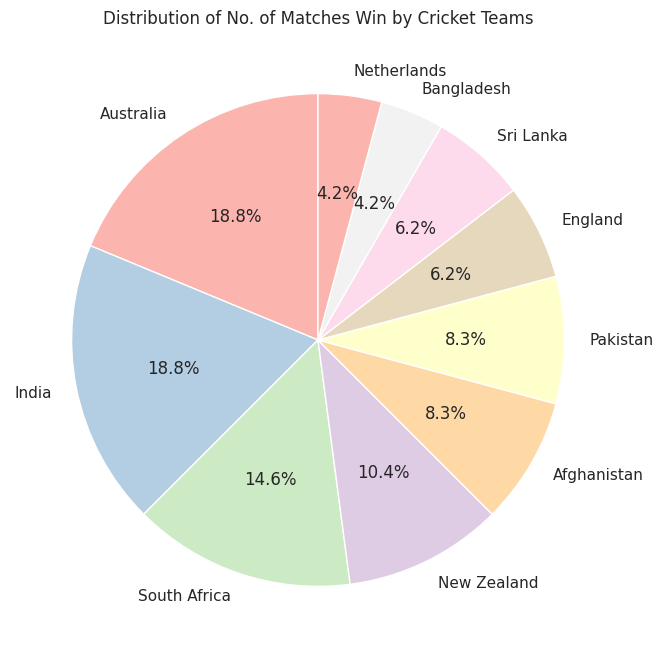

In [86]:
# Plot a pie chart for the distribution of matches won by cricket teams
plt.figure(figsize=(8, 8))
plt.pie(df_matche_wins['Match_no'], labels=df_matche_wins['Winner'], autopct='%1.1f%%', colors=plt.cm.Pastel1.colors, startangle=90)
plt.title('Distribution of No. of Matches Win by Cricket Teams')
plt.show()

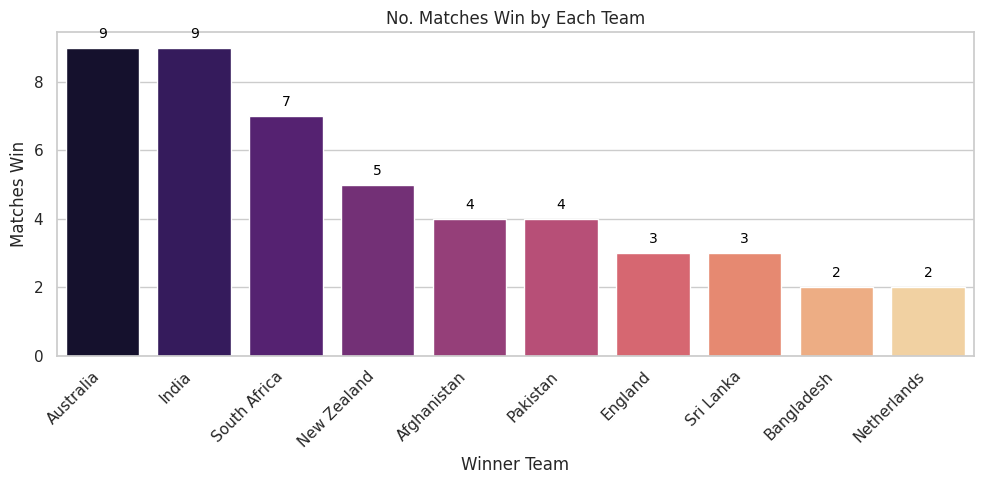

In [87]:
# Select the DataFrame for plotting
df = df_matche_wins

# Set Seaborn style
sns.set(style="whitegrid")

# Plot a bar graph using Seaborn
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Winner', y='Match_no', data=df, palette='magma', width=0.8)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Set plot labels and title
ax.set(xlabel='Winner Team', ylabel='Matches Win')
plt.title('No. Matches Win by Each Team')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()